# **SPAM EMAIL CLASSIFIER**

### **Prepare the dataset**

In [239]:
import pandas as pd

dataset_path = '../data/spam.csv'
df = pd.read_csv(dataset_path, encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- Since the dataset has unnecessary columns, we drop it and rename the main columns.

In [240]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **Exploratory Data Analysis**

In [241]:
print(f'The dataset contains {df.shape} rows and columns')

The dataset contains (5572, 2) rows and columns


- Check for the Spam-Ham distribution

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

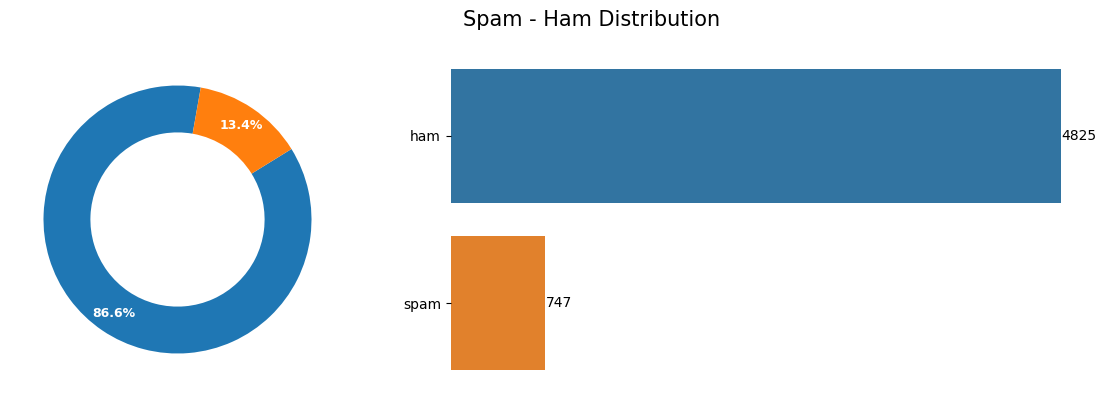

In [243]:
def plot_distribution(df):
    plt.rcParams.update({'figure.facecolor': 'white', 'axes.facecolor': 'white'})
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    value_counts = df['label'].value_counts()
    labels = value_counts.index.tolist()

    ax[0].pie(value_counts, labels=labels, autopct='%1.1f%%',
              textprops={'size': 9, 'color': 'white', 'fontweight': 'bold'}, 
              wedgeprops={'width': 0.35}, startangle=80, pctdistance=0.85)
    ax[0].add_artist(plt.Circle((0, 0), 0.6, fc='white'))

    sns.countplot(data=df, y='label', ax=ax[1], hue='label', order=labels, legend=False)
    for i, v in enumerate(value_counts):  
        ax[1].text(v + 1, i, str(v), color='black', fontsize=10, va='center')

    sns.despine(left=True, bottom=True)
    ax[1].set(ylabel=None, xlabel="", xticks=[])

    fig.suptitle('Spam - Ham Distribution', fontsize=15)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

plot_distribution(df)


In [244]:
df.shape

(5572, 2)

In [245]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


- The dataset has total of 5572 rows/emails.
- Has a total of unique 5169 emails.
- The most occuring message is "Sorry, I'll call later", appearing 30 times.
- The dataset consists of 86.6% (4825 out of 5572) ham and 13.4% (747 out of 5572) spam.

- Get the number of characters in each email and create a separate column for it.

In [246]:
email_len = df['text'].apply(len) # number of each character in each email
df = df.assign(length=email_len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


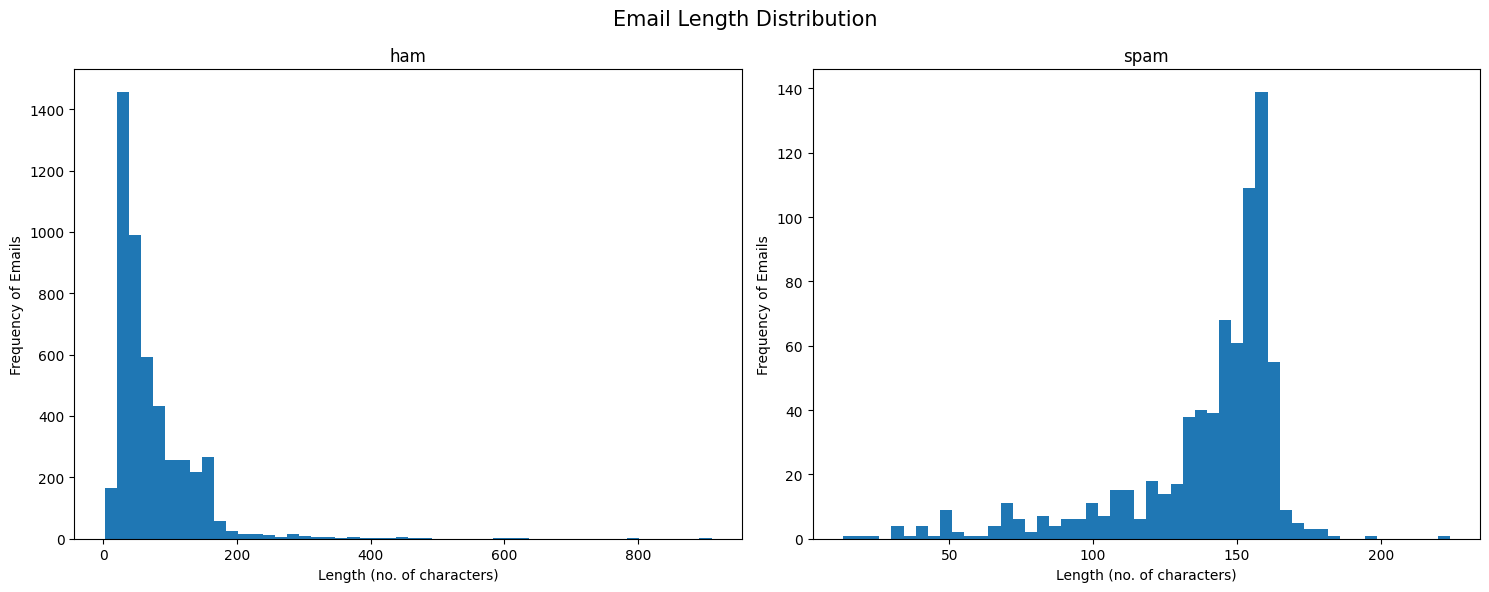

In [247]:
import matplotlib.pyplot as plt

def plot_len(df):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[df['label'] == 'ham']['length'].plot(kind='hist', bins=50, ax=ax[0])
    df[df['label'] == 'spam']['length'].plot(kind='hist', bins=50, ax=ax[1])
    ax[0].set_title('ham')
    ax[1].set_title('spam')
    
    for ax in ax:
        ax.set(xlabel='Length (no. of characters)', ylabel='Frequency of Emails')    
    
    fig.suptitle('Email Length Distribution', fontsize=15)
    plt.tight_layout()
    plt.show()
    
plot_len(df)

- Count how much each word occurs in the email and store them in a dataframe.

In [248]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords

def get_word_counts(text):
    all_text = ' '.join(text).lower()
    words = re.findall(r'\b[a-z]{' + str(3) + r',}\b', all_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts

ham_count = get_word_counts(df[df['label'] == 'ham']['text'])
spam_count = get_word_counts(df[df['label'] == 'spam']['text'])

ham_df = pd.DataFrame(ham_count.items(), columns=['word', 'count'])
spam_df = pd.DataFrame(spam_count.items(), columns=['word', 'count'])

- Bar plot for the most occuring ham and spam words.

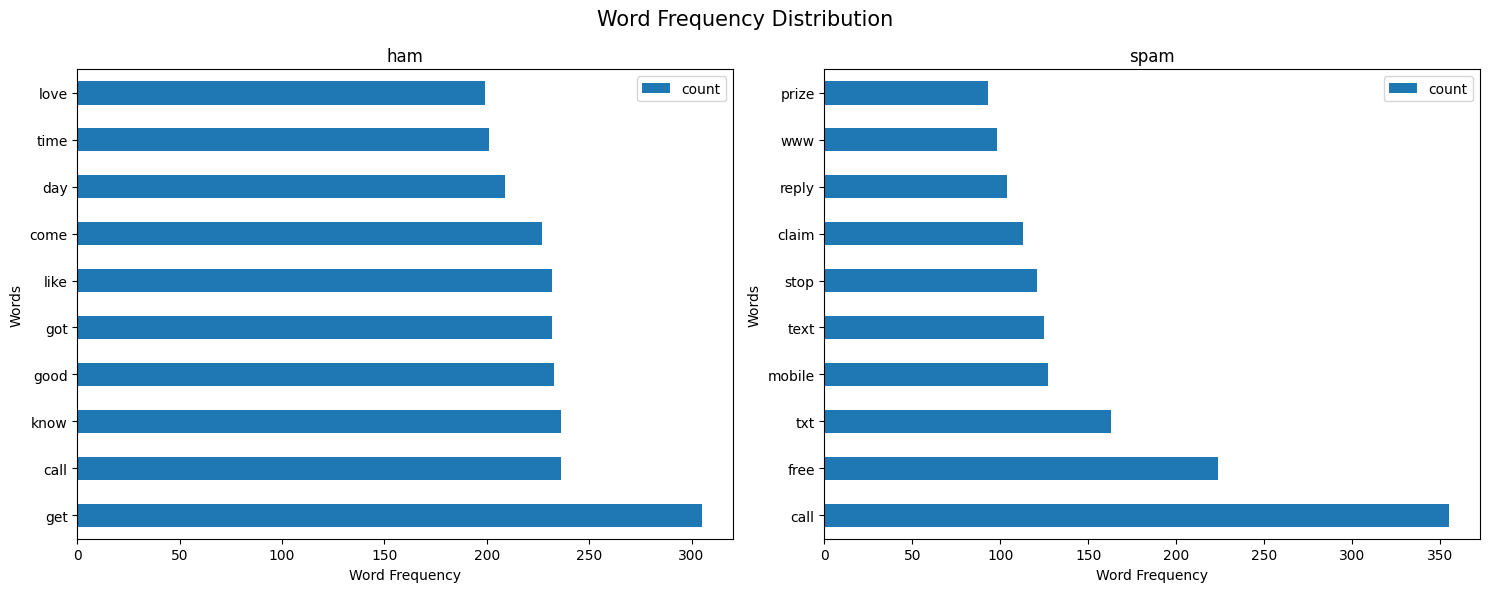

In [249]:
import matplotlib.pyplot as plt

def plot_word_counts(ham, spam):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    ham.sort_values(by='count', ascending=False).head(10).plot(kind='barh', x='word', y='count', ax=ax[0])
    spam.sort_values(by='count', ascending=False).head(10).plot(kind='barh', x='word', y='count', ax=ax[1])
    ax[0].set_title('ham')
    ax[1].set_title('spam')
    
    for ax in ax:
        ax.set(xlabel='Word Frequency', ylabel='Words')    
    
    fig.suptitle('Word Frequency Distribution', fontsize=15)
    plt.tight_layout()
    plt.show()
    
plot_word_counts(ham_df, spam_df)


### **Preprocessing the data**

- Convert the labels to binary. ( ham = 0, spam = 1)  

In [250]:
df.loc[:, 'label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


- Bag of words.

In [251]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
text = count.fit_transform(df['text'])

- Split the dataset.

In [252]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, df['label'], test_size=0.2, random_state=100)

y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

In [253]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4457, 8672), (1115, 8672), (4457,), (1115,))

### **Train the model/s**

In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### **Multinomial Naive Bayes**

In [255]:
from sklearn.naive_bayes import MultinomialNB

multiNB = MultinomialNB()
multiNB.fit(x_train, y_train)

multi_pred = multiNB.predict(x_test)

print("Multinomial Naive Bayes")
print("Accuracy score: {}". format(accuracy_score(y_test, multi_pred)) )
print("Precision score: {}". format(precision_score(y_test, multi_pred)) )
print("Recall score: {}". format(recall_score(y_test, multi_pred)))
print("F1 score: {}". format(f1_score(y_test, multi_pred)))

Multinomial Naive Bayes
Accuracy score: 0.97847533632287
Precision score: 0.9060402684563759
Recall score: 0.9310344827586207
F1 score: 0.9183673469387755


#### **Bernoulli Naive Bayes**

In [256]:
from sklearn.naive_bayes import BernoulliNB

bernNB = BernoulliNB()
bernNB.fit(x_train, y_train)

bern_pred = bernNB.predict(x_test)

print("Bernoulli Naive Bayes")
print("Accuracy score: {}". format(accuracy_score(y_test, bern_pred)) )
print("Precision score: {}". format(precision_score(y_test, bern_pred)) )
print("Recall score: {}". format(recall_score(y_test, bern_pred)))
print("F1 score: {}". format(f1_score(y_test, bern_pred)))

Bernoulli Naive Bayes
Accuracy score: 0.9865470852017937
Precision score: 1.0
Recall score: 0.896551724137931
F1 score: 0.9454545454545454


#### **MLPClassifer (Neural Network)**

In [257]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp = mlp.fit(x_train, y_train)

mlp_pred = mlp.predict(x_test)

print("MLP Classifier (Neural Network)")
print("Accuracy score: {}". format(accuracy_score(y_test, mlp_pred)) )
print("Precision score: {}". format(precision_score(y_test, mlp_pred)) )
print("Recall score: {}". format(recall_score(y_test, mlp_pred)))
print("F1 score: {}". format(f1_score(y_test, mlp_pred)))

MLP Classifier (Neural Network)
Accuracy score: 0.9829596412556054
Precision score: 0.9701492537313433
Recall score: 0.896551724137931
F1 score: 0.931899641577061


### **Evalute the model**

- Prepare the predictions of each model.

In [258]:
model_preds = [
    ('Multinomial Naive Bayes', multi_pred),
    ('Bernoulli Naive Bayes', bern_pred),
    ('MLP Classifier', mlp_pred)
]

#### **Confusion matrix comparison**

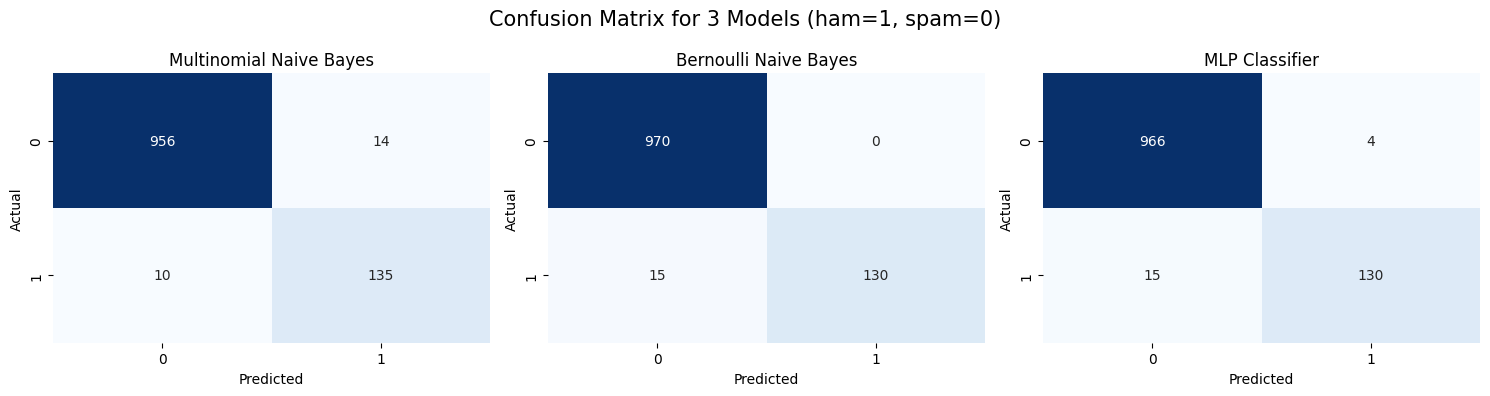

In [259]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix_plot(model_preds):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, (model_name, pred) in enumerate(model_preds):
        cm = confusion_matrix(y_test, pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[i])
        ax[i].set_title(model_name)
        ax[i].set(xlabel='Predicted', ylabel='Actual')

    fig.suptitle('Confusion Matrix for 3 Models (ham=1, spam=0)', fontsize=15)
    plt.tight_layout()
    plt.show()
 
confusion_matrix_plot(model_preds)

#### **Heatmap Metric Comparison**

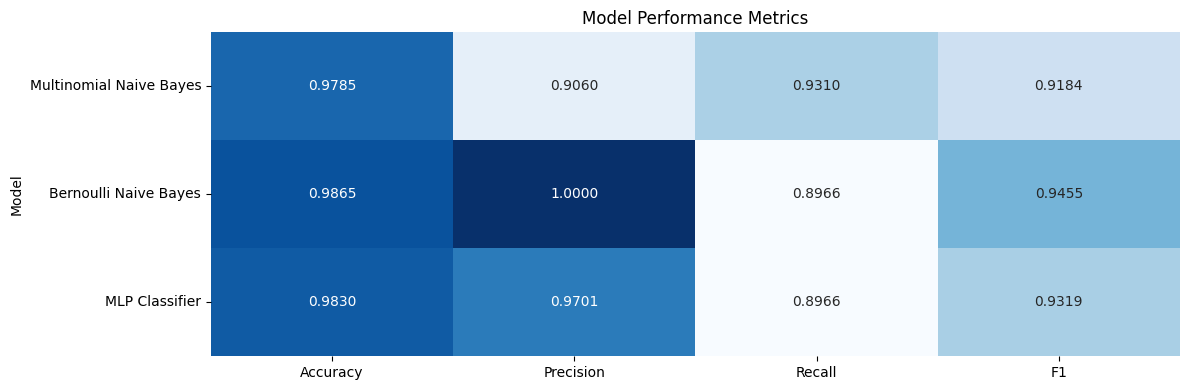

In [260]:
metrics = []
for model, pred in model_preds:
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    metrics.append([model, accuracy, precision, recall, f1])

def heatmap_plot(metrics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    sns.heatmap(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1']).set_index('Model'), 
                annot=True, fmt='.4f', cmap='Blues', cbar=False, ax=ax)
    ax.set_title('Model Performance Metrics')
    plt.tight_layout()
    plt.show()

heatmap_plot(metrics)

Best model for spam detection → Bernoulli Naive Bayes `bernNB`
- Highest accuracy (98.65%) and perfect precision (100%).
- Lower recall (89.66%) means it might miss some spam.
- Great for precision-focused tasks where false positives are costly.

Alternative option → Multinomial Naive Bayes `multiNB`
- Higher recall (93.1%) means it catches more spam than `bernNB`.
- Lower precision (90.6%) means more false positives (some ham emails misclassified as spam).
- Best if missing spam is worse than misclassifying ham.

`MLP` is not significantly better than `bernNB`.
- Slightly worse recall than `multiNB` but close to bernNB in performance.
- Not worth the extra computational cost compared to simple Naïve Bayes models.